In [43]:
import sys
import os
# Get the current script's directory
current_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Add the parent directory to sys.path
sys.path.append(parent_dir)
parent_dir

'd:\\algothon2025\\algothon2025'

In [44]:
import importlib
import preprocess
importlib.reload(preprocess)
import train_helper
importlib.reload(train_helper)

import pandas as pd
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator, StochasticOscillator, ROCIndicator, WilliamsRIndicator
from ta.trend import MACD
import numpy as np
from preprocess import preprocessTA, extract_features2, get_X_current2
from train_helper import rolling_train_predict

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [45]:
data = pd.read_csv("../prices.txt", sep="\\s+", header=None, index_col=None)
data.index = np.arange(data.shape[0])
data.rename(columns=lambda c: int(c), inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.25,69.06,62.08,31.80,63.01,28.30,36.93,43.23,42.31,67.37,...,74.39,41.30,30.05,39.53,76.07,28.62,72.03,24.02,76.03,27.50
1,38.11,69.98,62.39,31.74,62.49,28.23,37.13,42.85,41.85,68.41,...,74.69,41.70,30.18,38.93,75.71,28.47,72.11,24.04,76.05,27.54
2,37.90,69.56,62.82,31.57,62.74,28.60,36.57,42.99,41.48,69.84,...,75.14,41.14,30.09,38.17,75.56,28.48,72.54,23.76,75.66,27.55
3,37.64,69.39,63.26,31.56,61.85,28.67,37.09,43.23,41.24,70.36,...,75.24,41.38,30.08,38.24,75.35,28.59,73.75,23.97,75.71,27.74
4,37.70,69.71,64.04,31.42,62.02,28.42,37.09,42.90,41.40,69.12,...,75.33,41.69,30.34,37.85,75.21,28.55,74.32,24.01,75.77,27.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33.00,50.72,49.67,34.37,42.13,24.85,17.15,45.52,31.03,51.68,...,77.37,35.49,28.30,27.78,69.38,27.57,67.43,16.06,83.25,27.50
996,32.88,50.78,49.55,34.35,41.60,24.84,16.94,46.13,30.77,53.43,...,77.48,35.85,28.13,28.00,69.31,27.61,67.96,16.10,83.26,27.41
997,32.59,51.01,49.88,33.72,41.58,25.00,16.88,45.61,31.16,52.48,...,77.71,36.26,27.72,27.94,69.20,27.45,66.92,16.22,83.37,27.45
998,32.57,50.73,50.18,34.24,41.52,25.01,16.69,45.75,31.52,52.33,...,77.28,36.39,27.74,27.85,68.93,27.29,66.85,16.00,83.32,27.54


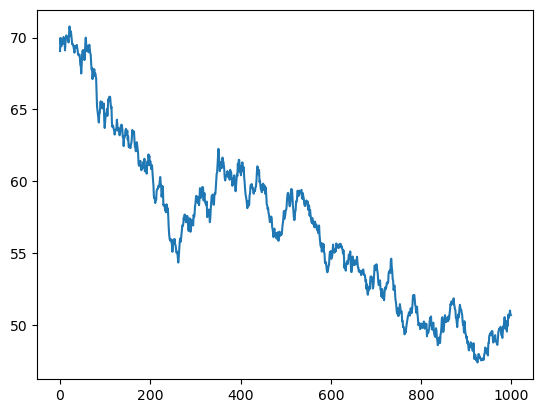

In [46]:
# Try out on 1
CHOSEN = 1
plt.plot(data[CHOSEN])

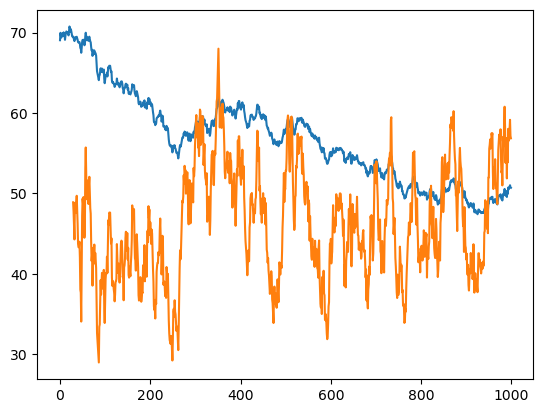

In [47]:
# Test RSI
rsi = RSIIndicator(close=data[CHOSEN], window=30)
rsi_series = rsi.rsi()
plt.plot(data[CHOSEN])
plt.plot(rsi_series)

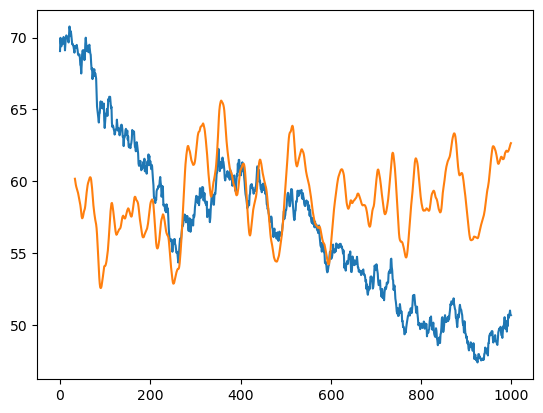

In [48]:
# Test MACD
macd = MACD(close=data[CHOSEN], window_slow=26, window_fast=12, window_sign=9)
macd_signal = macd.macd_signal() * 8 + 60
plt.plot(data[CHOSEN])
plt.plot(macd_signal)

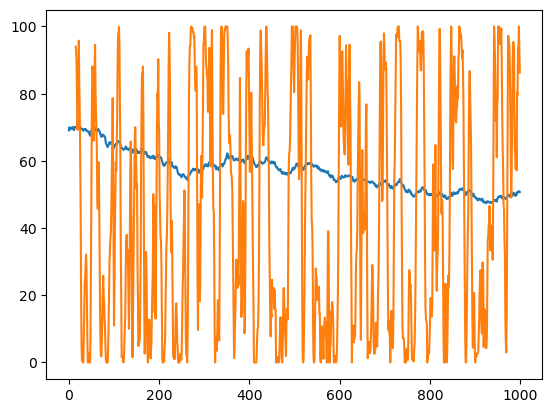

In [49]:
# Test stochastic oscillator
stoch_osc = StochasticOscillator(close=data[CHOSEN], high=data[CHOSEN], low=data[CHOSEN], window=14, smooth_window=3)
stoch_sign = stoch_osc.stoch_signal()
plt.plot(data[CHOSEN])
plt.plot(stoch_sign)

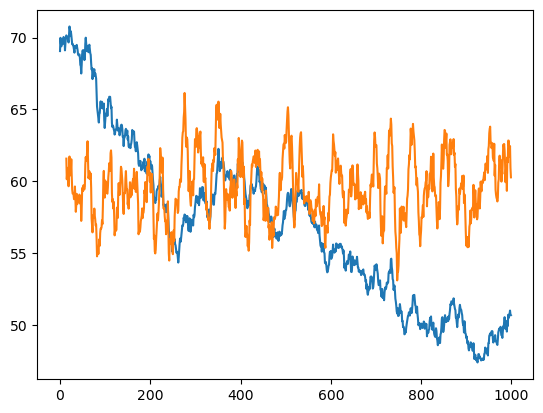

In [50]:
# ROC indicator
roc = ROCIndicator(close=data[CHOSEN], window=14)
roc_vals = roc.roc() + 60
plt.plot(data[CHOSEN])
plt.plot(roc_vals)

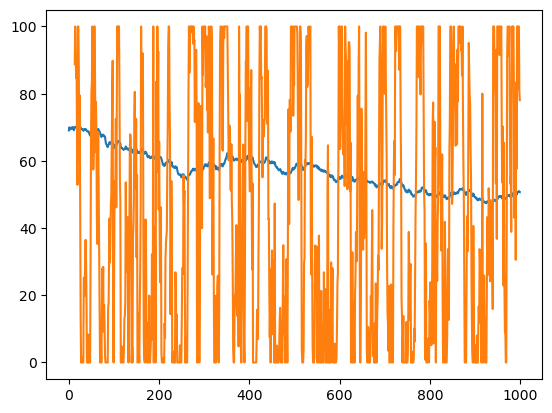

In [51]:
# Testing WilliamsRIndicator
williamR = WilliamsRIndicator(high=data[CHOSEN], low=data[CHOSEN], close=data[CHOSEN], lbp=14)
williamR_vals = williamR.williams_r() + 100
plt.plot(data[CHOSEN])
plt.plot(williamR_vals)

In [52]:
# Test on chosen
X_df, y_df = preprocessTA(price_df=data, stock=CHOSEN, extract_features=extract_features2, get_X_current=get_X_current2)

In [53]:
X_df

,rsi_1,rsi2_1,macd_1,macd2_1,macd3_1,stoch_1,stoch2_1,roc_1,roc2_1,roc3_1,...,macd_50,macd2_50,macd3_50,stoch_50,stoch2_50,roc_50,roc2_50,roc3_50,williamR_50,williamR2_50
50,51.255819,47.338316,0.013101,0.066566,-0.066949,45.341615,9.959436,-0.405151,-0.921261,1.101645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,55.599832,50.143130,0.065253,0.097794,-0.013808,78.674948,17.999637,0.406858,-0.360490,0.392271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.332175,NaN,NaN
52,54.015060,49.323782,0.083406,0.084029,0.019501,98.333333,25.637828,0.363531,-0.216857,-0.115774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.600171,NaN,NaN
53,55.766178,50.390400,0.092908,0.069714,0.047078,98.333333,33.778531,0.508943,0.246555,0.144886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.244393,NaN,NaN
54,48.394655,46.668160,0.070120,0.026517,0.047389,90.925926,39.748744,-0.101700,-0.936464,-0.520833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.461162,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,62.380924,51.317872,0.066891,0.021968,0.120512,90.421456,62.991368,1.428271,1.641760,-0.103434,...,-0.101615,-0.069517,-0.128808,0.959233,40.192519,-3.320961,-3.188576,-1.138634,-100.000000,-100.000000
946,60.567949,50.702688,0.053036,0.005921,0.115214,83.141762,68.790705,1.195470,1.793249,-0.082833,...,-0.058247,-0.003503,-0.107254,16.253350,36.505019,-2.217467,-1.508621,1.576076,-54.117647,-59.375000
947,51.082876,47.272715,0.027407,-0.018411,0.096911,70.694110,72.025273,0.945974,0.670860,-0.476684,...,-0.050824,-0.002389,-0.106340,23.835784,31.990436,-2.520023,-1.207682,-0.736025,-74.375000,-78.645833
948,61.553769,52.560250,0.032380,-0.000593,0.099265,74.115655,76.875847,1.510701,0.833681,0.749688,...,-0.067347,-0.027672,-0.123648,23.835784,25.840436,-3.249168,-2.118812,-0.941884,-100.000000,-100.000000


In [54]:
y_df

50    -1
51    -1
52    -1
53    -1
54    -1
      ..
945    1
946    1
947    1
948    1
949    1
Length: 900, dtype: int64

In [55]:
# X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, random_state=2605, shuffle=True, test_size=0.2, stratify=y_df)
# X_train

total = X_df.shape[0]
train_size = int(total * 0.8)
X_train = X_df.iloc[:train_size]
y_train = y_df[:train_size]
X_test = X_df[train_size:]
y_test = y_df[train_size:]

In [56]:
# Make a random forest
randomForest = RandomForestClassifier(n_estimators=200, max_depth=10)


In [57]:
randomForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [58]:
y_pred = randomForest.predict(X_test)

Accuracy:  0.4222222222222222


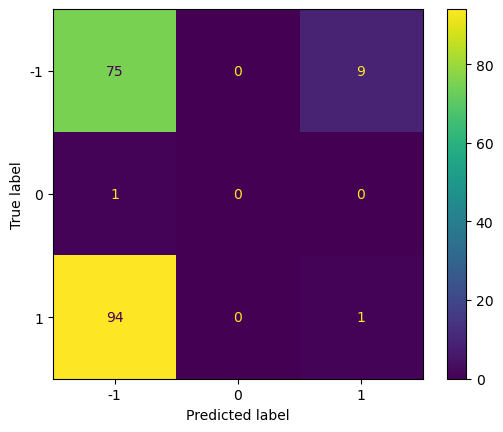

In [59]:
print("Accuracy: ", accuracy_score(y_true=y_test, y_pred=y_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ConfusionMatrixDisplay(cm, display_labels=randomForest.classes_).plot()

In [60]:
y_true, y_pred = rolling_train_predict(randomForest, X_df, y_df, window=150)

1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
1.0 [1.] [-1]
0.965 [0.965 0.035] [-1]
0.86 [0.86 0.14] [-1]
0.74 [0.74 0.26] [-1]
0.78 [0.78 0.22] [-1]
0.665 [0.665 0.335] [-1]
0.65 [0.65 0.35] [-1]
0.54 [0.54 0.46] [-1]
0.505 [0.495 0.505] [0]
0.52 [0.48 0.52] [0]
0.605 [0.605 0.395] [-1]
0.675 [0.675 0.325] [-1]
0.64 [0.64 0.36] [-1]
0.64 [0.64 0.36] [-1]
0.725 [0.725 0.275] [-1]
0.66 [0.66 0.34] [-1]
0.62 [0.62 0.38] [-1]
0.54 [0.54 0.46] [-1]
0.59 [0.59 0.41] [-1]


In [63]:
len(y_true), len(y_pred)

(749, 749)

Accuracy:  0.7222963951935915
Accuracy without 0:  0.6822784810126582


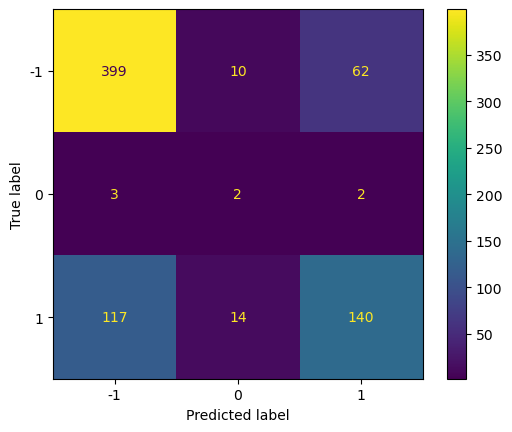

In [64]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
print("Accuracy: ", accuracy_score(y_true=y_true, y_pred=y_pred))
print("Accuracy without 0: ", (cm[0][0] + cm[2][2])/ (cm[0][0] + cm[1][0] + cm[2][0] + cm[2][0] + cm[2][1] + cm[2][2]))
ConfusionMatrixDisplay(cm, display_labels=randomForest.classes_).plot()